# Outline

# 1.Einleitung

# 2. Simulation

In [269]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.api import SARIMAX
from arch import arch_model
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.stats.diagnostic import het_arch
from sklearn import linear_model
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
import matplotlib.patches as mpatches
import pylab
from math import sqrt
import statsmodels.api as sm
import seaborn as sns

In [270]:
Kompo_Temp = pd.read_excel(r"/Users/lailafdoul/Desktop/EDA/Kompo_Temp.xls")
ARMA_Temp = pd.read_excel(r"/Users/lailafdoul/Desktop/EDA/ARMA_Temp.xls")
GARCH_Temp = pd.read_excel(r"/Users/lailafdoul/Desktop/EDA/GARCH_Temp.xls" ) 
Kompo_Preis = pd.read_excel(r"/Users/lailafdoul/Desktop/EDA/Kompo_Preis.xls")
ARMA_Preis = pd.read_excel(r"/Users/lailafdoul/Desktop/EDA/ARMA_Preis.xls")
GARCH_Preis = pd.read_excel(r"/Users/lailafdoul/Desktop/EDA/GARCH_Preis.xls" ) 




#Series = pd.read_excel(r"/Users/lailafdoul/Desktop/EDA/Temp.xlsx", index_col=0)
#Temp  = pd.DataFrame(Series)
#Coeff_Trend = open(r"/Users/lailafdoul/Desktop/EDA/Coeff_Trend.xls" )
#Coeff_Saison = open(r"/Users/lailafdoul/Desktop/EDA/Coeff_Saison.xls" )
#Coeff_Saison = Coeff_Saison.readlines()
#print(Coeff_Saison[0])
#Coeff = Coeff.readlines()
#trend_coeff = trend_coeff[0]
#Trend_coef1 = Coeff[0].split()
#Trend_coef1 = Trend_coef1[1]
#Trend_coef2 = Coeff[1].split()
#Trend_coef2 = Trend_coef2[1]
#print(Trend_coef1,Trend_coef2)


# 2.1 Simulation der Temperaturdaten

/Users/lailafdoul/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/Users/lailafdoul/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.19566D+00    |proj g|=  1.26359D-01

At iterate    5    f=  2.17239D+00    |proj g|=  2.18374D-02

At iterate   10    f=  2.16623D+00    |proj g|=  2.62059D-03

At iterate   15    f=  2.16600D+00    |proj g|=  1.32849D-03

At iterate   20    f=  2.16599D+00    |proj g|=  1.60795D-04

At iterate   25    f=  2.16599D+00    |proj g|=  3.37610D-04

At iterate   30    f=  2.16582D+00    |proj g|=  1.63865D-02

At iterate   35    f=  2.12378D+00    |proj g|=  4.56817D-02

At iterate   40    f=  2.12093D+00    |proj g|=  7.18518D-03

At iterate   45    f=  2.11966D+00    |proj g|=  1.79809D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/lailafdoul/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  2.11949D+00    |proj g|=  6.81726D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     88      2     0     0   6.817D-04   2.119D+00
  F =   2.1194910760659575     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/Users/lailafdoul/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


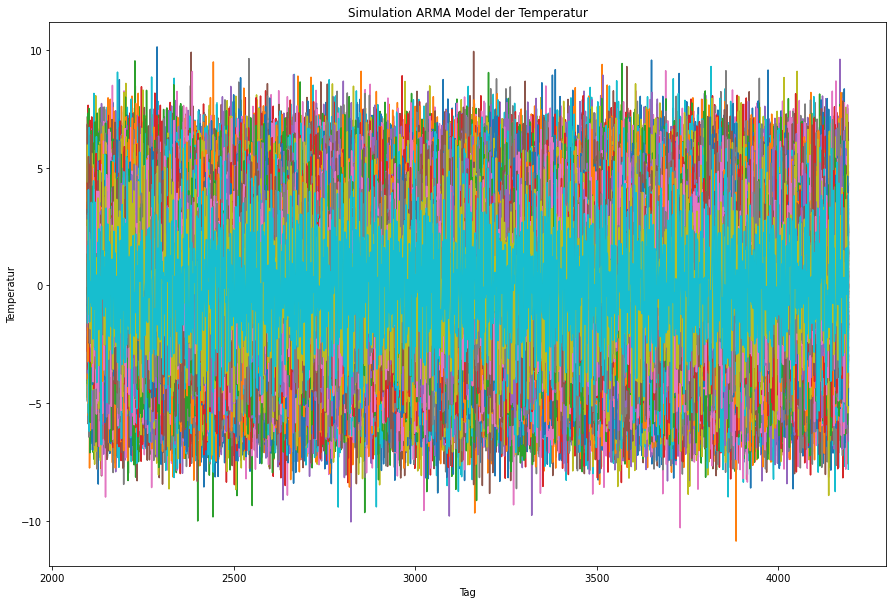

In [271]:
# Simulation des ARMA Modells 

len_Sim = 1000
Temp_diff = Kompo_Temp['residuals_wt'].diff().iloc[20000:-1]
model_temp = SARIMAX(Temp_diff.dropna(), order=(2,1,2))
fitted = model_temp.fit()
ARMA_Simulation = fitted.simulate(nsimulations = len(Temp_diff), repetitions = 1000,  anchor='end')
ARMA_Simulation = pd.DataFrame(ARMA_Simulation)
plt.rcParams["figure.figsize"] = (15, 10)
plt.title('Simulation ARMA Model der Temperatur')
plt.plot(ARMA_Simulation)
plt.xlabel('Tag')
plt.ylabel('Temperatur')
plt.show()



Iteration:      5,   Func. Count:     35,   Neg. LLF: 4458.63810243733
Iteration:     10,   Func. Count:     65,   Neg. LLF: 4502.696550666526
Iteration:     15,   Func. Count:     94,   Neg. LLF: 4438.236238826046
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4438.236238173037
            Iterations: 16
            Function evaluations: 99
            Gradient evaluations: 16


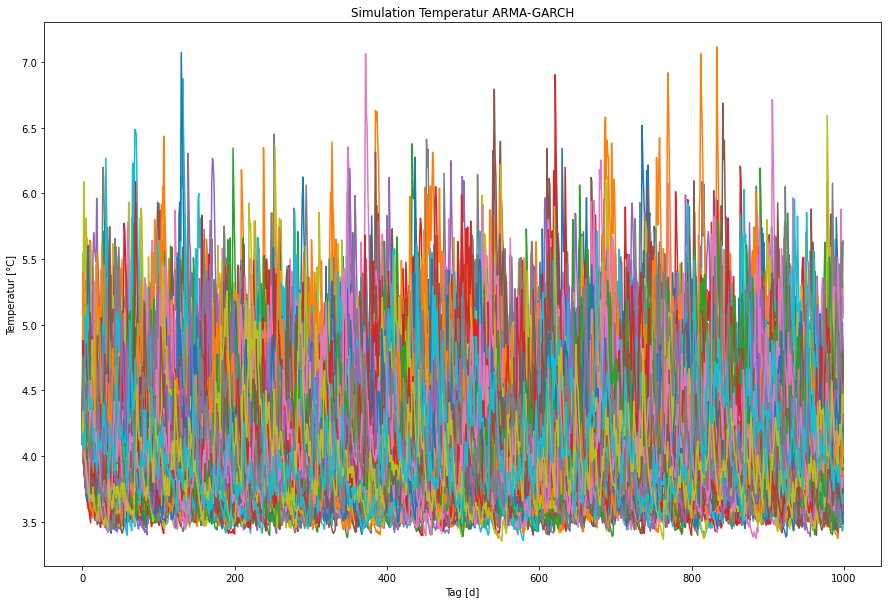

In [215]:
# Simulation des ARMA-GARCH Modells

model_garch = arch_model(ARMA_Temp['residuals'].iloc[1:], mean = 'Constant', vol = 'GARCH', p=1, q=1)
result_garch = model_garch.fit(update_freq = 5)
forecasts = result_garch.forecast(horizon=len_Sim, method="simulation", reindex=False)
AG_Simulation = forecasts.simulations
plt.title('Simulation Temperatur ARMA-GARCH')
plt.plot(AG_Simulation.residual_variances[-1, ::5].T)
plt.xlabel('Tag [d]')
plt.ylabel('Temperatur [°C]')
plt.show()



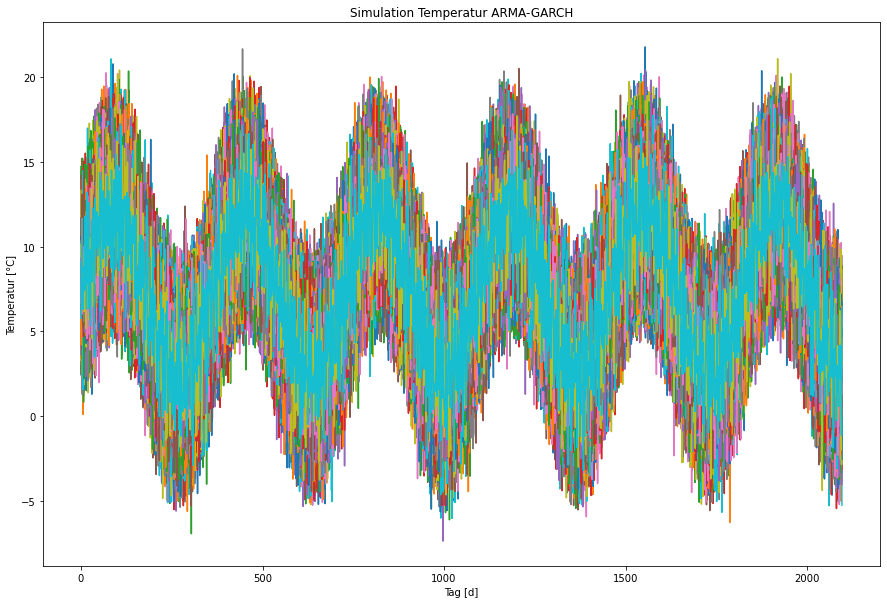

In [272]:
# Berechnung des Trends und Saison

Trend_coef1 = 7.15177 
Trend_coef2 = 0.00013
Saison_coef1 = 4.871596021656086 
Saison_coef2 = 0.11684290496679786

Trend = []
Saison = []

for i in range(1, len(Temp_diff)+1):
    
    
    Trend_reg = Trend_coef1 +  Trend_coef2 * i
    Trend.append(Trend_reg)

    Saison_reg = Saison_coef2 * (np.cos(2*np.pi/365*i)) + Saison_coef1*(np.sin(2*np.pi/365*i))
    Saison.append(Saison_reg)


# Zusammensetzung der verschiedenen Komponenten

SIM_ARMA = pd.DataFrame().reindex_like(ARMA_Simulation)

for i in range(0,1000):
    SIM_ARMA.iloc[:,i]= ARMA_Simulation.iloc[:,i] + np.array(Trend) + np.array(Saison)


#Visualisierung
plt.title('Simulation Temperatur ARMA-GARCH')
plt.plot(SIM_ARMA.to_numpy())
plt.xlabel('Tag [d]')
plt.ylabel('Temperatur [°C]')
plt.show()













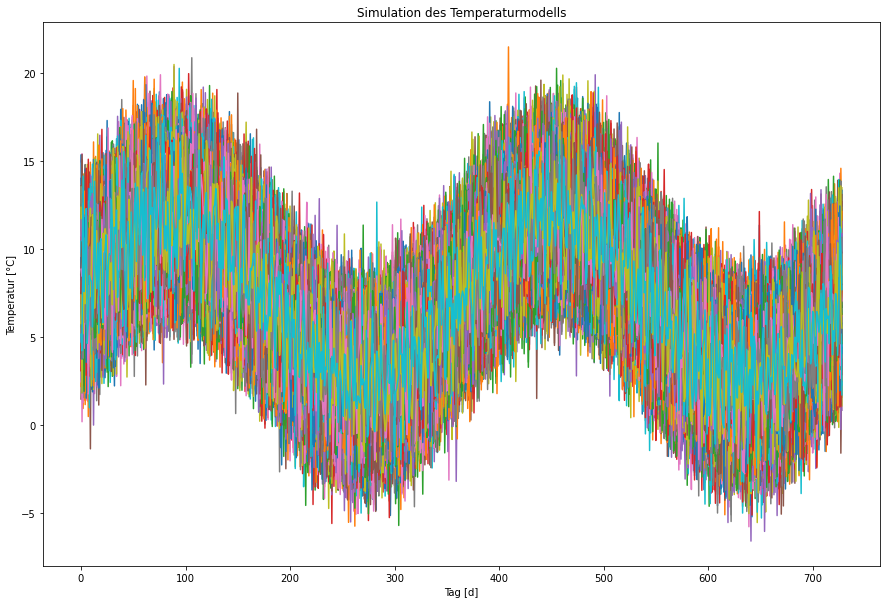

In [203]:

# Betrachtung des 2. Jahres der Simulation

SIM_final = SIM_ARMA[1:730]

# Visualisierung

plt.title('Simulation des Temperaturmodells')
plt.plot(SIM_final.to_numpy())
plt.xlabel('Tag [d]')
plt.ylabel('Temperatur [°C]')
plt.show()



# 2.2 Simulation der Gaspreisdaten

Ziel:
Simulation von Gaspreisdaten mit Hilfe des erstellten ARMA und GARCH Modells, zur späteren Berechnung der HDD und damit des Fernwärmeabsatzes.

/Users/lailafdoul/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/Users/lailafdoul/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/Users/lailafdoul/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/lailafdoul/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible star

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.91859D+00    |proj g|=  1.15738D+00

At iterate    5    f=  1.36227D+00    |proj g|=  4.61157D-02

At iterate   10    f=  1.33928D+00    |proj g|=  7.63992D-03

At iterate   15    f=  1.33847D+00    |proj g|=  8.14874D-04

At iterate   20    f=  1.33843D+00    |proj g|=  3.95787D-05

At iterate   25    f=  1.33843D+00    |proj g|=  1.93300D-04

At iterate   30    f=  1.33843D+00    |proj g|=  6.76224D-04

At iterate   35    f=  1.33842D+00    |proj g|=  5.85140D-03

At iterate   40    f=  1.33836D+00    |proj g|=  3.02182D-04

At iterate   45    f=  1.33834D+00    |proj g|=  1.21315D-04

At iterate   50    f=  1.33834D+00    |proj g|=  1.22403D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/Users/lailafdoul/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/lailafdoul/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


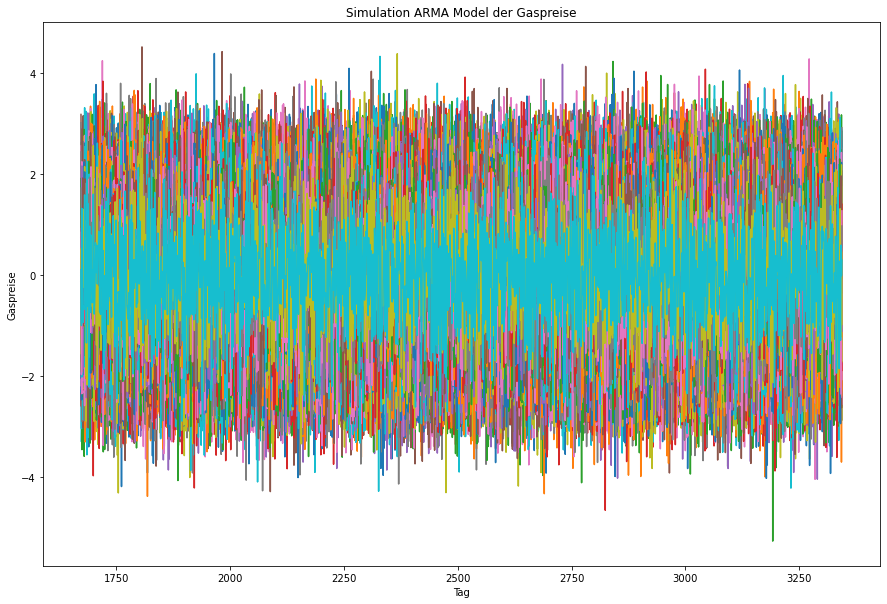

In [276]:
# Simulation des ARMA Modells


Preis_diff = Kompo_Preis['residuals_wt_'].diff()

model_temp = SARIMAX(Preis_diff.dropna(), order=(2,1,2))
fitted = model_temp.fit()
ARMA_Simulation_Preis = fitted.simulate(nsimulations = len(Preis_diff), repetitions = 1000,  anchor='end')
ARMA_Simulation_Preis = pd.DataFrame(ARMA_Simulation_Preis)
plt.rcParams["figure.figsize"] = (15, 10)
plt.title('Simulation ARMA Model der Gaspreise')
plt.plot(ARMA_Simulation_Preis)
plt.xlabel('Tag')
plt.ylabel('Gaspreise')
plt.show()


Iteration:     10,   Func. Count:     63,   Neg. LLF: 417.36120465270574
Optimization terminated successfully    (Exit mode 0)
            Current function value: 417.3610876096543
            Iterations: 13
            Function evaluations: 77
            Gradient evaluations: 13


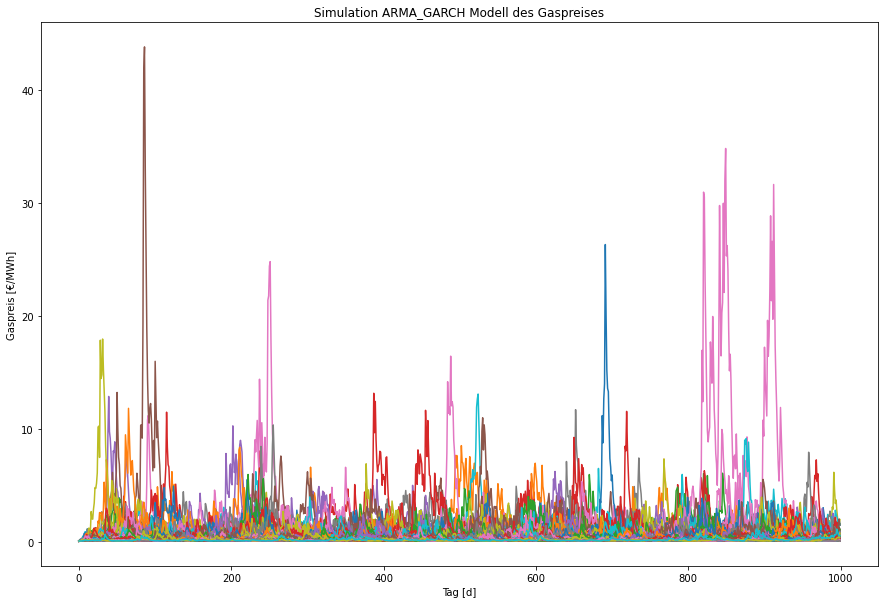

In [289]:
# Simulation des ARMA-GARCH Modells

GARCH_Preis = arch_model(ARMA_Preis['residuals'].iloc[1:], mean = 'Constant', vol = 'GARCH', p=1, q=1)
Garch_Preis_r = GARCH_Preis.fit(update_freq = 10)
forecasts_Preis = Garch_Preis_r.forecast(horizon=len_Sim, method="simulation", reindex=False)
AG_Simulation_Preis = forecasts_Preis.simulations
plt.title('Simulation ARMA_GARCH Modell des Gaspreises')
plt.plot(AG_Simulation_Preis.residual_variances[-1, ::1].T)
plt.xlabel('Tag [d]')
plt.ylabel('Gaspreis [€/MWh]')
plt.show()




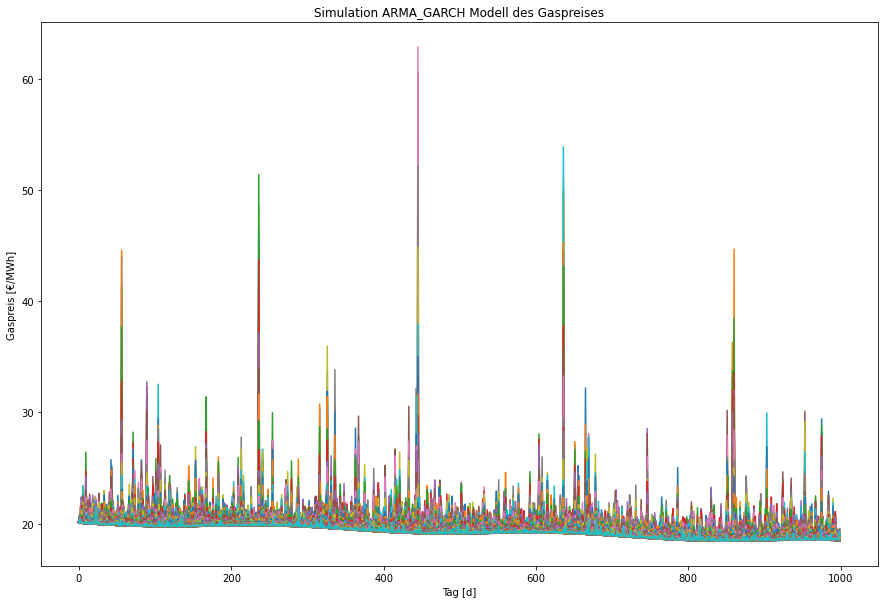

In [292]:
# Berechnung des Trends und Saison

preis_tcoef1 = 20.03082490407418         # Koeffizienten wurden aus dem Komponentenmodell entnommen 
preis_tcoef2 = -0.0017752505058644197
preis_Scoef1 = -0.028738201917118615  
preis_Scoef2 = -0.17238493723847165

Trend_preis = []
Saison_preis = []

for i in range(1, len(Preis_diff)+1):
    
    
    Trend_regp = preis_tcoef1 +  preis_tcoef2 * i
    Trend_preis.append(Trend_regp)

    Saison_regp = preis_Scoef1 * (np.cos(2*np.pi/365*i)) + preis_Scoef2 *(np.sin(2*np.pi/365*i))
    Saison_preis.append(Saison_regp)

# Zusammensetzung der verschiedenen Komponenten

ARMA_GARCH_Sim = pd.DataFrame(AG_Simulation_Preis.residual_variances[-1, ::1])
ARMA_GARCH_Preis = pd.DataFrame().reindex_like(ARMA_GARCH_Sim)


for i in range(0,1000):
    
    ARMA_GARCH_Preis.iloc[:,i] = ARMA_GARCH_Sim.iloc[:,i] + np.array(Trend_preis)[:1000] + np.array(Saison_preis)[:1000]
    
#Visualisierung

plt.title('Simulation ARMA_GARCH Modell des Gaspreises')
plt.plot(ARMA_GARCH_Preis.to_numpy())
plt.xlabel('Tag [d]')
plt.ylabel('Gaspreis [€/MWh]')
plt.show()








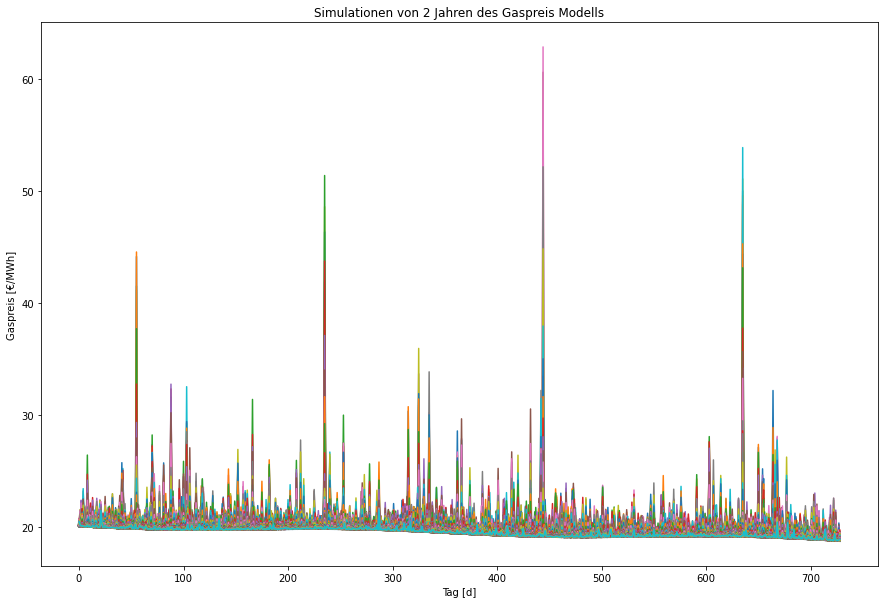

In [295]:
# Betrachtung des 2. Jahres der Simulation

Preis_SIM_final = ARMA_GARCH_Preis[1:730]

# Visualisierung

plt.title('Simulationen von 2 Jahren des Gaspreis Modells')
plt.plot(Preis_SIM_final.to_numpy())
plt.xlabel('Tag [d]')
plt.ylabel('Gaspreis [€/MWh]')
plt.show()

# Berechnung des Deckungsbeitrages


Ziel:

Abschätzung des Gesamtrisikos des Fernwärmeversorgers mit Hilfe des Deckungsbeitrages

# Berechnung Heizgradtage

Ziel:
Simulation der HDD Daten aus den Temperaturdaten

In [ ]:
# Berechnung der HDD

zeros_vect = np.zeros((SIM_final.shape))
HDD_tsim = np.maximum(zeros_vect, 16 - SIM_final)


# Visualisierung

plt.title('Heizgradtage')
plt.plot(HDD_tsim.to_numpy())
plt.xlabel('Tag [d]')
plt.ylabel('HDD [Kd]')
plt.show()


In [ ]:
# Plot des Mittelwertes der HDD

SIM_HDD_mean = np.mean(HDD_tsim)

plt.title('Mittelwert HDD über 1000 Simulationen')
plt.plot(SIM_HDD_mean.to_numpy(), label='Close')
plt.xlabel('Tag [d]')
plt.ylabel('HDD [Kd]')
plt.show()




### Erkenntnis:

Bei Vergleich des Mittelwertes der HDD Daten mit den ursprünglichen HDD Daten der Temperatur, ist die Simulation ein Erfolg.
Vor allem die Nullwerte im Sommer sprechen für eine erfolgreiche Simulation. 

### Berechnung Fernwärmeabsatz

Ziel:
Berechnung des Fernwärmeabsatzes aus der linearen Abhängigkeit von HDD und Fernwärmeabsatz (aus dem Excel Sheet: Einführung_Wetterderivate)

In [ ]:

 
# Absatz pro Tag

Absatz_tsim = 20 + 30 * (HDD_tsim)



#HDD = pd.DataFrame(HDD_Sim)
#HDD.index = Temp.index[:729]
#Sum_HDD = HDD.resample('M').sum()
#print(Sum_HDD)

